In [ ]:
# Importing necessary libraries
from astropy.table import Table
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns
import joblib


In [ ]:
# Reading the data
dft = Table.read('/home/samanehjavadinia/Co-op/Data/ngvs_matched.fits')


In [ ]:
dft.columns

In [ ]:
dft = dft[['ngvsID','x_sex','y_sex','ra_in','dec_in','elongation','umag','gmag','rmag','imag','zmag','ksmag','uerr'
           ,'gerr','rerr','ierr','zerr','kserr','iC','iCerr','ebv',  
           'field','background_g','ug0','gi0','iz0','ik0','p_star','p_gc','p_galx',
'main_type','other_types', 'angDist']].to_pandas()


In [ ]:
dft['angDist'].unique()


In [ ]:
dft['angDist'].hist()

In [ ]:
dft['original_index'] = dft.index
df_angdist = dft.copy()

In [ ]:
# dft = dft.drop(columns='angDist')

In [ ]:
dft['original_index']

In [ ]:
dft.columns

In [ ]:
# Apply the transformations to all columns
dft = dft.applymap(lambda x: x.decode('UTF-8').strip().upper() if isinstance(x, bytes) else x)

In [ ]:
dft = dft.drop(columns=['ngvsID','field','x_sex','y_sex','ra_in','dec_in', 'other_types'])

In [ ]:
dft.head()

In [ ]:
dft.columns

In [ ]:
dft.shape

In [ ]:
dft_cleaned = dft.dropna(subset=['main_type'])
unlabeled_data = dft[dft['main_type'].isna()]

In [ ]:
dft_cleaned['original_index']

In [ ]:
unlabeled_data['original_index']

In [ ]:
dft_cleaned.shape

In [ ]:
unlabeled_data.shape

In [ ]:
unlabeled_data = unlabeled_data.copy()

In [ ]:
dft = dft_cleaned.copy()

In [ ]:
# List of columns for which to print unique values
columns = ['elongation', 'ksmag', 'kserr', 'ik0']

# Loop through the columns and print unique values
for column in columns:
    unique_values = unlabeled_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

In [ ]:
dft = dft.drop(columns=['elongation', 'ksmag', 'kserr', 'ik0'])
unlabeled_data = unlabeled_data.drop(columns=['elongation', 'ksmag', 'kserr', 'ik0'])

In [ ]:
dft.columns

In [ ]:
dft.shape

In [ ]:
unlabeled_data.shape

In [ ]:
def drop_rows_with_99(df):
    """
    Drops rows from the DataFrame where any of the features have a value of 99.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with rows containing the value 99 dropped.
    """
    return  df[~(df == 99).any(axis=1)]


dft_cleaned = drop_rows_with_99(dft)
print(dft_cleaned.shape)

unlabeled_data_cleaned = drop_rows_with_99(unlabeled_data)
print(unlabeled_data_cleaned.shape)

In [ ]:
dft = dft_cleaned.copy()
unlabeled_data = unlabeled_data_cleaned.copy()

In [ ]:
# Filter to omit rows where umag is more than 30 or err is more than 0.5
filtered_dft = dft[(dft['umag'] <= 30) & (dft['uerr'] <= 0.5) & (dft['gerr'] <= 0.5) & (dft['rerr']<= 0.5) & (dft['ierr']<= 0.5)]
filtered_unlabeled_data = unlabeled_data[(unlabeled_data['umag'] <= 30) & (unlabeled_data['uerr'] <= 0.5) & (unlabeled_data['gerr'] <= 0.5) & (unlabeled_data['rerr']<= 0.5) & (unlabeled_data['ierr']<= 0.5)]

print(filtered_dft.shape)
print(filtered_unlabeled_data.shape)

In [ ]:
dft = filtered_dft.copy()
unlabeled_data = filtered_unlabeled_data.copy()

In [ ]:
print(dft.shape)
print(unlabeled_data.shape)


In [ ]:
# Filter the dataframe for each column separately where values are more than 0.5
uerr_filtered_df = dft[dft['uerr'] > 0.5]
gerr_filtered_df = dft[dft['gerr'] > 0.5]
rerr_filtered_df = dft[dft['rerr'] > 0.5]
ierr_filtered_df = dft[dft['ierr'] > 0.5]

# Get the range of values for each column
uerr_range = (uerr_filtered_df['uerr'].min(), uerr_filtered_df['uerr'].max())
gerr_range = (gerr_filtered_df['gerr'].min(), gerr_filtered_df['gerr'].max())
rerr_range = (rerr_filtered_df['rerr'].min(), rerr_filtered_df['rerr'].max())
ierr_range = (ierr_filtered_df['ierr'].min(), ierr_filtered_df['ierr'].max())

# Print the ranges
print(f"Range of 'uerr' values where 'uerr' > 0.5: {uerr_range}")
print(f"Range of 'gerr' values where 'gerr' > 0.5: {gerr_range}")
print(f"Range of 'rerr' values where 'rerr' > 0.5: {rerr_range}")
print(f"Range of 'ierr' values where 'ierr' > 0.5: {ierr_range}")

In [ ]:
import pandas as pd

# Assuming 'unlabeled_data' is your dataframe and it has columns 'uerr', 'gerr', 'rerr', and 'ierr'

# Filter the dataframe for each column separately where values are more than 0.5
uerr_filtered_df = unlabeled_data[unlabeled_data['uerr'] > 0.5]
gerr_filtered_df = unlabeled_data[unlabeled_data['gerr'] > 0.5]
rerr_filtered_df = unlabeled_data[unlabeled_data['rerr'] > 0.5]
ierr_filtered_df = unlabeled_data[unlabeled_data['ierr'] > 0.5]

# Get the range of values for each column
uerr_range = (uerr_filtered_df['uerr'].min(), uerr_filtered_df['uerr'].max())
gerr_range = (gerr_filtered_df['gerr'].min(), gerr_filtered_df['gerr'].max())
rerr_range = (rerr_filtered_df['rerr'].min(), rerr_filtered_df['rerr'].max())
ierr_range = (ierr_filtered_df['ierr'].min(), ierr_filtered_df['ierr'].max())

# Print the ranges
print(f"Range of 'uerr' values where 'uerr' > 0.5: {uerr_range}")
print(f"Range of 'gerr' values where 'gerr' > 0.5: {gerr_range}")
print(f"Range of 'rerr' values where 'rerr' > 0.5: {rerr_range}")
print(f"Range of 'ierr' values where 'ierr' > 0.5: {ierr_range}")


In [ ]:
# Function to get the value counts of columns with fewer than 5 unique values
def print_columns_with_fewer_than_5_unique_values(df):
    for column in df.columns:
        unique_values_count = df[column].nunique()
        if unique_values_count < 5:
            print(f"Value counts for column '{column}' (unique values: {unique_values_count}):")
            print(df[column].value_counts())
            print("\n")

# Assuming df is your DataFrame
print_columns_with_fewer_than_5_unique_values(dft)

In [ ]:
# Assuming df is your DataFrame
print_columns_with_fewer_than_5_unique_values(unlabeled_data)

In [ ]:
unlabeled_data.columns

Feature Engineering Section

In [ ]:
import pandas as pd
import numpy as np

def create_feature_differences_with_errors(df, feature_groups, error_groups, proxy_feature):
    """
    Create all combinations of differences for each group of features and 
    the square root of the sum of squared errors for each combination.
    
    :param df: pandas DataFrame containing the data
    :param feature_groups: List of lists, where each sublist contains feature names to create differences from
    :param error_groups: List of lists, where each sublist contains error feature names corresponding to the feature groups
    :return: DataFrame with new difference and error features and original features dropped
    """
    for group, error_group in zip(feature_groups, error_groups):
        print(group)
        print(error_group)
        # Create combinations of differences for each group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                diff_feature_name = f'{group[i]}_minus_{group[j]}'
                error_feature_name = f'{error_group[i]}_minus_{error_group[j]}'
                
                df[diff_feature_name] = df[group[i]] - df[group[j]]
                df[error_feature_name] = np.sqrt(df[error_group[i]]**2 + df[error_group[j]]**2)

        # Drop the original features of the current group except the proxy feature
        # print(group)
        # Create a list of features to drop (all except proxy_feature)
        features_to_drop = [feature for feature in group if feature != proxy_feature]
        df.drop(columns=features_to_drop, inplace=True)
        df.drop(columns=error_group, inplace=True)
    
    return df



# Define the proxy feature to retain
proxy_feature = 'gmag'

# Define the feature groups and corresponding error groups
feature_groups = [
    ['umag', 'gmag', 'rmag', 'imag', 'zmag']
]

error_groups = [
    ['uerr', 'gerr', 'rerr', 'ierr', 'zerr']
]



# Apply the function
dft = create_feature_differences_with_errors(dft, feature_groups, error_groups, proxy_feature)
unlabeled_data = create_feature_differences_with_errors(unlabeled_data, feature_groups, error_groups, proxy_feature)
print(dft.columns)
print(unlabeled_data.columns)




In [ ]:

# def create_feature_differences(df, feature_groups):
#     """
#     Create all combinations of differences for each group of features and drop the original ones.
    
#     :param df: pandas DataFrame containing the data
#     :param feature_groups: List of lists, where each sublist contains feature names to create differences from
#     :return: DataFrame with new difference features and original features dropped
#     """
#     for group in feature_groups:
#         # Create combinations of differences for each group
#         for i in range(len(group)):
#             for j in range(i + 1, len(group)):
#                 diff_feature_name = f'{group[i]}_minus_{group[j]}'
#                 df[diff_feature_name] = df[group[i]] - df[group[j]]

#         # Drop the original features of the current group
#         df.drop(columns=group, inplace=True)
    
#     return df


# # Define the feature groups
# feature_groups = [
#     ['umag', 'gmag', 'rmag', 'imag', 'zmag'],
#     ['uerr', 'gerr', 'rerr', 'ierr', 'zerr']
# ]

# # Apply the function
# dft = create_feature_differences(dft, feature_groups)
# unlabeled_data = create_feature_differences(unlabeled_data, feature_groups)
# print(dft.columns)
# print(unlabeled_data.columns)

In [ ]:
pd.set_option('display.max_columns', None)
dft.describe()

In [ ]:
dft['main_type'].value_counts()

In [ ]:
# Create and display the pie chart of the new column
category_counts = dft['main_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count the occurrences of each category
category_counts = dft['main_type'].value_counts()

# Specify the categorical column
category_column = 'main_type'

# Define the threshold for rare categories
threshold = 300  # Categories with counts less than or equal to this will be grouped into "Other"

# Count the occurrences of each category
category_counts = dft[category_column].value_counts()

# Identify the rare categories
rare_categories = category_counts[category_counts <= threshold].index

# Create a new column with grouped categories
dft['grouped_category'] = dft[category_column].apply(lambda x: 'Other' if x in rare_categories else x)

# Print the number of different categories in the new column
num_categories = dft['grouped_category'].nunique()
print(f'The number of different categories in the new grouped column: {num_categories}')



# Count the occurrences of each category
category_counts = dft['grouped_category'].value_counts()


# Create and display the pie chart of the new column
category_counts = dft['grouped_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Grouped Categories')
plt.show()

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dft['grouped_category'].value_counts()

In [ ]:
dft.columns

In [ ]:
dft = dft.drop(columns='main_type')

In [ ]:
# Get the unique types in the 'grouped_category' column
unique_types = dft['grouped_category'].apply(type).unique()
print("Different types in 'grouped_category' column:", unique_types)

In [ ]:
# Ensure all values in 'grouped_category' are strings
dft['grouped_category'] = dft['grouped_category'].astype(str)

In [ ]:
df = dft.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
df['main_type_encoded'] = label_encoder.fit_transform(df['grouped_category'])

# Save the encoder to disk
joblib.dump(label_encoder, 'label_encoder.pkl')

In [ ]:
df.columns

In [ ]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of the features with the target
correlation_with_target = correlation_matrix['main_type_encoded'].drop('main_type_encoded')


# Sort correlations
sorted_correlations = correlation_with_target.sort_values()

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
df.columns

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [ 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0', 'p_star',
       'p_gc', 'p_galx', 'umag_minus_gmag', 'umag_minus_rmag',
       'umag_minus_imag', 'umag_minus_zmag', 'gmag_minus_rmag',
       'gmag_minus_imag', 'gmag_minus_zmag', 'rmag_minus_imag',
       'rmag_minus_zmag', 'imag_minus_zmag', 'uerr_minus_gerr',
       'uerr_minus_rerr', 'uerr_minus_ierr', 'uerr_minus_zerr',
       'gerr_minus_rerr', 'gerr_minus_ierr', 'gerr_minus_zerr',
       'rerr_minus_ierr', 'rerr_minus_zerr', 'ierr_minus_zerr',
       'grouped_category', 'main_type_encoded']
scatter_matrix(df[attributes], figsize=(40, 40))
plt.show()

In [ ]:
df = df.drop(columns=[ 'p_galx', 'p_star', 'p_gc', 'grouped_category'])

In [ ]:
unlabeled_data.columns

In [ ]:
unlabeled_data['main_type'].value_counts()

In [ ]:
unlabeled_data = unlabeled_data.drop(columns=[ 'p_galx', 'p_star', 'p_gc','main_type'])

In [ ]:
unlabeled_data.columns

In [ ]:
df['original_index']

In [ ]:
unlabeled_data['original_index']

In [ ]:
from tabulate import tabulate

# Print the DataFrame columns in a tabulated format
columns = df.columns.tolist()
print(tabulate([[col] for col in columns], headers=['Columns'], tablefmt='grid'))

In [ ]:
# Save the train and test datasets to CSV files
df.to_csv('/home/samanehjavadinia/Co-op/Data/modified_dataset.csv', index=False)
unlabeled_data.to_csv('/home/samanehjavadinia/Co-op/Data/unlabeled_data.csv', index=False)

#############LOading
###########
#######
#########
#########


In [1]:
# Importing necessary libraries
from astropy.table import Table
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns
import joblib

In [2]:
# If you want to load the data later, you can use the following code
df = pd.read_csv('/home/samanehjavadinia/Co-op/Data/modified_dataset.csv')
unlabeled_data = pd.read_csv('/home/samanehjavadinia/Co-op/Data/unlabeled_data.csv')
# Load the encoder from disk
label_encoder = joblib.load('label_encoder.pkl')


In [3]:
df.shape

(2747, 31)

In [4]:
# Decode the labels in the labeled dataset
decoded_labels = label_encoder.inverse_transform(df['main_type_encoded'])



In [5]:
np.unique(decoded_labels)

array(['GLCL', 'GLCL?_CANDIDATE', 'Other'], dtype=object)

In [6]:

# Count occurrences of "GLCL" and "Other"
glcl_count = np.sum(decoded_labels == "GLCL")
other_count = np.sum(decoded_labels == "Other")
GLCL_CANDIDATE_count = np.sum(decoded_labels == 'GLCL?_CANDIDATE')
total_count = len(decoded_labels)

# Calculate percentage of "GLCL"
glcl_percentage = (glcl_count / total_count) * 100

print(f"Number of 'GLCL' labels in Labeled Dataset: {glcl_count}")
print(f"Number of 'Other' labels in Labeled Dataset: {other_count}")
print(f"Number of 'GLCL_CANDIDATE' labels in Labeled Dataset: {GLCL_CANDIDATE_count}")
print(f"Total number of labels in Labeled Dataset: {total_count}")

print(f"Percentage of 'GLCL' labels in Labeled Dataset: {glcl_percentage:.2f}%")

Number of 'GLCL' labels in Labeled Dataset: 1176
Number of 'Other' labels in Labeled Dataset: 634
Number of 'GLCL_CANDIDATE' labels in Labeled Dataset: 937
Total number of labels in Labeled Dataset: 2747
Percentage of 'GLCL' labels in Labeled Dataset: 42.81%


In [7]:
# Create a binary mapping for visualization
binary_to_original_mapping = {
    1: "GLCL",
    0: 'Other'
}

# Map the decoded labels to binary form
binary_labels = np.where(decoded_labels == "GLCL", 1, 0)

# Decode binary labels to their original form using the mapping
decoded_binary_labels = np.array([binary_to_original_mapping[label] for label in binary_labels])

# Count occurrences of each label
glcl_count = np.sum(decoded_binary_labels == "GLCL")
other_count = np.sum(decoded_binary_labels == "Other")
glcl_candidate_count = np.sum(decoded_labels == 'GLCL_CANDIDATE')  # Direct count from the original labels
total_count = len(decoded_labels)

# Calculate percentage of "GLCL"
glcl_percentage = (glcl_count / total_count) * 100

# Print statistics
print(f"Number of 'GLCL' labels in Labeled Dataset: {glcl_count}")
print(f"Number of 'Other' labels in Labeled Dataset: {other_count}")
print(f"Number of 'GLCL_CANDIDATE' labels in Labeled Dataset: {glcl_candidate_count}")
print(f"Total number of labels in Labeled Dataset: {total_count}")
print(f"Percentage of 'GLCL' labels in Labeled Dataset: {glcl_percentage:.2f}%")

Number of 'GLCL' labels in Labeled Dataset: 1176
Number of 'Other' labels in Labeled Dataset: 1571
Number of 'GLCL_CANDIDATE' labels in Labeled Dataset: 0
Total number of labels in Labeled Dataset: 2747
Percentage of 'GLCL' labels in Labeled Dataset: 42.81%


In [8]:
# Save the original indices for the remaining rows
original_indices = df['original_index']

In [9]:
original_indices

0       2141045
1       2141604
2       2143465
3       2144155
4       2144541
         ...   
2742    2701879
2743    2702015
2744    2703359
2745    2703522
2746    2703578
Name: original_index, Length: 2747, dtype: int64

In [10]:
original_indices.loc[5]

2144568

In [11]:
df.loc[0]

gmag                 2.160920e+01
iC                  -7.300000e-03
iCerr                1.105778e-02
ebv                  2.200000e-02
background_g         4.830860e-01
ug0                  1.081862e+00
gi0                  7.680740e-01
iz0                  8.377400e-02
angDist              4.592300e-02
original_index       2.141045e+06
umag_minus_gmag      1.102301e+00
uerr_minus_gerr      1.386669e-02
umag_minus_rmag      1.664600e+00
uerr_minus_rerr      1.371660e-02
umag_minus_imag      1.905201e+00
uerr_minus_ierr      1.434521e-02
umag_minus_zmag      1.999599e+00
uerr_minus_zerr      1.745809e-02
gmag_minus_rmag      5.622997e-01
gerr_minus_rerr      4.897448e-03
gmag_minus_imag      8.029003e-01
gerr_minus_ierr      6.451744e-03
gmag_minus_zmag      8.972988e-01
gerr_minus_zerr      1.185854e-02
rmag_minus_imag      2.406006e-01
rerr_minus_ierr      6.122499e-03
rmag_minus_zmag      3.349991e-01
rerr_minus_zerr      1.168268e-02
imag_minus_zmag      9.439850e-02
ierr_minus_zer

In [12]:
df[df['original_index']==2144155]

,gmag,iC,iCerr,ebv,background_g,ug0,gi0,iz0,angDist,original_index,...,gerr_minus_ierr,gmag_minus_zmag,gerr_minus_zerr,rmag_minus_imag,rerr_minus_ierr,rmag_minus_zmag,rerr_minus_zerr,imag_minus_zmag,ierr_minus_zerr,main_type_encoded
3,22.2509,0.0681,0.014189,0.022,1.22202,1.376862,0.967374,0.181674,0.043713,2144155,...,0.009795,1.1945,0.015443,0.358501,0.008986,0.5508,0.014944,0.192299,0.015971,1


In [13]:
df.columns

Index(['gmag', 'iC', 'iCerr', 'ebv', 'background_g', 'ug0', 'gi0', 'iz0',
       'angDist', 'original_index', 'umag_minus_gmag', 'uerr_minus_gerr',
       'umag_minus_rmag', 'uerr_minus_rerr', 'umag_minus_imag',
       'uerr_minus_ierr', 'umag_minus_zmag', 'uerr_minus_zerr',
       'gmag_minus_rmag', 'gerr_minus_rerr', 'gmag_minus_imag',
       'gerr_minus_ierr', 'gmag_minus_zmag', 'gerr_minus_zerr',
       'rmag_minus_imag', 'rerr_minus_ierr', 'rmag_minus_zmag',
       'rerr_minus_zerr', 'imag_minus_zmag', 'ierr_minus_zerr',
       'main_type_encoded'],
      dtype='object')

In [14]:
df_angdist = df.copy()
df = df.drop(columns = 'angDist')

In [15]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['main_type_encoded'], random_state=42)

# Further split the training data into a training set and a calibration set
train_df, calib_df = train_test_split(train_df, test_size=0.2, stratify=train_df['main_type_encoded'], random_state=42)

# Separate X and y for training and testing
X_train = train_df.drop(columns=['main_type_encoded', 'original_index'])
y_train = train_df['main_type_encoded']
X_test = test_df.drop(columns=['main_type_encoded', 'original_index'])
y_test = test_df['main_type_encoded']
X_calib = calib_df.drop(columns=['main_type_encoded', 'original_index'])
y_calib = calib_df['main_type_encoded']

# Save the original indices for reference
train_indices = train_df['original_index']
test_indices = test_df['original_index']
calib_indices = calib_df['original_index']

In [16]:
train_indices

1088    2230204
1560    2252743
2725    2698227
370     2189418
1053    2228728
         ...   
533     2206358
2115    2357103
1396    2244509
379     2190099
941     2221509
Name: original_index, Length: 1757, dtype: int64

In [17]:
test_indices.loc[3]

2144155

In [18]:
X_train.head()

,gmag,iC,iCerr,ebv,background_g,ug0,gi0,iz0,umag_minus_gmag,uerr_minus_gerr,...,gmag_minus_imag,gerr_minus_ierr,gmag_minus_zmag,gerr_minus_zerr,rmag_minus_imag,rerr_minus_ierr,rmag_minus_zmag,rerr_minus_zerr,imag_minus_zmag,ierr_minus_zerr
1088,23.947100,-0.1543,0.485856,0.023,287.583008,0.891133,0.400391,0.143191,0.912500,0.160661,...,0.4368,0.145046,0.591099,0.210069,0.067101,0.152270,0.221399,0.215121,0.154299,0.234185
1560,22.554399,0.0497,0.033238,0.023,15.558300,0.942133,0.701491,0.161591,0.963501,0.027849,...,0.7379,0.016147,0.910599,0.025041,0.225800,0.016500,0.398499,0.025270,0.172699,0.026736
2725,21.896700,0.1048,0.015045,0.041,0.139739,1.028911,0.666197,0.082797,1.066999,0.014373,...,0.7311,0.007988,0.833700,0.013804,0.240700,0.008074,0.343300,0.013854,0.102600,0.014624
370,23.885000,0.1238,0.059165,0.021,3.645280,0.932191,0.907957,0.302057,0.951700,0.088647,...,0.9412,0.041467,1.253401,0.063679,0.415701,0.039778,0.727901,0.062592,0.312201,0.066888
1053,23.895700,-0.0057,0.100056,0.023,45.513100,1.225233,1.075091,-0.032209,1.246599,0.128016,...,1.1115,0.050912,1.090401,0.081978,0.751400,0.057161,0.730301,0.085998,-0.021099,0.081978


In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def scale_numeric_columns(train_df, test_df, calib_df):
    # Identify non-numeric and numeric columns
    non_numeric_columns = train_df.select_dtypes(include=['object']).columns
    numeric_columns = train_df.select_dtypes(exclude=['object']).columns

    # Separate non-numeric and numeric columns
    train_non_numeric = train_df[non_numeric_columns]
    train_numeric = train_df[numeric_columns]

    test_non_numeric = test_df[non_numeric_columns]
    test_numeric = test_df[numeric_columns]
    
    calib_non_numeric = calib_df[non_numeric_columns]
    calib_numeric = calib_df[numeric_columns]

    # Handle missing values in numeric columns
    train_numeric = train_numeric.dropna()
    test_numeric = test_numeric.dropna()
    calib_numeric = calib_numeric.dropna()

    # Scale the numeric columns
    scaler = MinMaxScaler()
    train_numeric_scaled = scaler.fit_transform(train_numeric)
    test_numeric_scaled = scaler.transform(test_numeric)
    calib_numeric_scaled = scaler.transform(calib_numeric)
    
    # Convert the scaled array back to DataFrames
    train_numeric_scaled = pd.DataFrame(train_numeric_scaled, columns=numeric_columns)
    test_numeric_scaled = pd.DataFrame(test_numeric_scaled, columns=numeric_columns)
    calib_numeric_scaled = pd.DataFrame(calib_numeric_scaled, columns=numeric_columns)
    
    # Combine the scaled numeric columns with the non-numeric columns
    train_scaled = pd.concat([train_numeric_scaled, train_non_numeric.reset_index(drop=True)], axis=1)
    test_scaled = pd.concat([test_numeric_scaled, test_non_numeric.reset_index(drop=True)], axis=1)
    calib_scaled = pd.concat([calib_numeric_scaled, calib_non_numeric.reset_index(drop=True)], axis=1)

    return train_scaled, test_scaled, calib_scaled

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
X_train_scaled, X_test_scaled, X_calib_scaled = scale_numeric_columns(X_train, X_test, X_calib )
# print("Scaled train data:", X_train_scaled.head())
# print("Scaled test data:", X_test_scaled.head())

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()
X_calib = X_calib_scaled.copy()

In [20]:
X_train.head()

,gmag,iC,iCerr,ebv,background_g,ug0,gi0,iz0,umag_minus_gmag,uerr_minus_gerr,...,gmag_minus_imag,gerr_minus_ierr,gmag_minus_zmag,gerr_minus_zerr,rmag_minus_imag,rerr_minus_ierr,rmag_minus_zmag,rerr_minus_zerr,imag_minus_zmag,ierr_minus_zerr
0,0.849247,0.058183,0.926329,0.107143,0.703339,0.302076,0.240659,0.386301,0.299598,0.330665,...,0.239613,0.854819,0.252242,0.375581,0.139234,0.786327,0.191411,0.382414,0.386412,0.405131
1,0.648468,0.405240,0.061393,0.107143,0.039006,0.318868,0.307943,0.397235,0.316406,0.055594,...,0.306802,0.090692,0.306725,0.043251,0.198079,0.081736,0.234821,0.043741,0.397348,0.044947
2,0.553651,0.498979,0.026627,0.750000,0.001351,0.347440,0.300056,0.350414,0.350514,0.027683,...,0.305284,0.042324,0.293612,0.023068,0.203604,0.038006,0.221291,0.023376,0.355682,0.023918
3,0.840294,0.531303,0.110939,0.035714,0.009912,0.315594,0.354080,0.480702,0.312517,0.181514,...,0.352167,0.240793,0.365182,0.112648,0.268494,0.202540,0.315563,0.110319,0.480267,0.114661
4,0.841837,0.310990,0.189080,0.107143,0.112161,0.412079,0.391428,0.282075,0.409702,0.263052,...,0.390168,0.296780,0.337386,0.145515,0.392970,0.292749,0.316151,0.152073,0.282157,0.140860


########### Training on XGBoost
############
############
###########
###########

In [21]:
X_train.shape

(1757, 28)

In [22]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# import xgboost as xgb
# import xgboost as xgb
# from mapie.classification import MapieClassifier
# from mapie.metrics import classification_coverage_score


# # Initialize the XGBoost classifier
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

# # Train the classifier
# xgb_classifier.fit(X_train, y_train)


# # Apply conformal prediction using the calibration set
# mapie_clf = MapieClassifier(xgb_classifier, method="score", cv="prefit")
# mapie_clf.fit(X_train, y_train)


# # Predict with confidence intervals
# y_pred, y_pis = mapie_clf.predict(X_test, alpha=0.99)  # 90% prediction intervals



# # Predict with prediction sets
# y_pred, y_pis = mapie_clf.predict(X_test, alpha=0.5)  # 50% prediction sets to significantly broaden intervals

# # Check the structure of y_pis and ensure it contains prediction sets
# print(f"Structure of y_pis: {y_pis.shape}")

# # Diagnose the number of classes included in the prediction sets
# num_classes_in_pis = np.sum(y_pis, axis=1)
# print(f"Number of classes in prediction sets: {np.unique(num_classes_in_pis, return_counts=True)}")

# # Check for samples where y_pis has more than one True
# samples_with_multiple_classes = [(i, np.where(y_pis[i])[0]) for i in range(len(y_pis)) if np.sum(y_pis[i]) > 1]

# # Print the indices and prediction sets of such samples
# print("Samples with multiple classes in prediction sets:")
# for sample in samples_with_multiple_classes:
#     print(f"Sample index: {sample[0]}, Prediction set: {sample[1]}")

# # Ensure y_pis is transformed correctly for coverage calculation
# y_pis_transformed = np.array([set(np.where(y_pis[i])[0]) for i in range(len(y_pis))])

# # Create a boolean array for coverage calculation
# y_pis_boolean = np.zeros((len(y_test), len(np.unique(y_test))), dtype=bool)
# for i in range(len(y_test)):
#     y_pis_boolean[i, list(y_pis_transformed[i])] = True

# # Calculate coverage
# coverage = classification_coverage_score(y_test, y_pis_boolean)
# print(f"Coverage: {coverage:.2f}")


In [23]:


# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:')
# print(report)

# # Print the mapping between original labels and encoded values
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print("Label Mapping:", label_mapping)

# # Decode the labels using the dictionary
# decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
# print(decoded_labels)

# # Plot the confusion matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix with Decoded Labels')
# plt.show()

# # Save the trained model to a file
# model_filename = 'xgboost_model.pkl'
# joblib.dump(xgb_classifier, model_filename)
# print(f'Model saved to {model_filename}')


In [24]:
# # Get the index of the label 'GLCL'
# glcl_index = label_mapping["GLCL"]

# # Extract the row and column corresponding to 'GLCL' in the confusion matrix
# glcl_conf_matrix_row = conf_matrix[glcl_index, :]
# glcl_conf_matrix_col = conf_matrix[:, glcl_index]

# # Calculate the number of true positives, false positives, false negatives, and true negatives for 'GLCL'
# true_positives_glcl = glcl_conf_matrix_row[glcl_index]
# false_positives_glcl = sum(glcl_conf_matrix_col) - true_positives_glcl
# false_negatives_glcl = sum(glcl_conf_matrix_row) - true_positives_glcl
# true_negatives_glcl = np.sum(conf_matrix) - (true_positives_glcl + false_positives_glcl + false_negatives_glcl)

# # Calculate the accuracy for 'GLCL'
# accuracy_glcl = (true_positives_glcl + true_negatives_glcl) / np.sum(conf_matrix)

# print(f'Number of correct predictions for label GLCL: {true_positives_glcl}')
# print(f'Number of false predictions for label GLCL: {false_negatives_glcl + false_positives_glcl}')
# print(f'Accuracy for label GLCL: {accuracy_glcl:.2f}')



In [25]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of classes
# num_classes = conf_matrix.shape[0]

# # Initialize lists to store precision, recall, and f1 score for each label
# precisions = []
# recalls = []
# f1_scores = []



# # Calculate precision, recall, and f1 score for each class
# for i in range(num_classes):
#     tp = conf_matrix[i, i]
#     fp = np.sum(conf_matrix[:, i]) - tp
#     fn = np.sum(conf_matrix[i, :]) - tp

#     precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#     precisions.append(precision)
#     recalls.append(recall)
#     f1_scores.append(f1_score)

# # Plot Precision, Recall, and F1 Score for each class
# labels = list(label_mapping.keys())
# x = np.arange(len(labels))
# bar_width = 0.3

# plt.figure(figsize=(16, 6))

# # Plot Precision
# plt.subplot(1, 3, 1)
# plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Precision')
# plt.title('Precision for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(precisions):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot Recall
# plt.subplot(1, 3, 2)
# plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Recall')
# plt.title('Recall for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(recalls):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot F1 Score
# plt.subplot(1, 3, 3)
# plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('F1 Score')
# plt.title('F1 Score for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(f1_scores):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# plt.tight_layout()
# plt.show()


############## Binary Classification with catboost

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bylevel': 0.8, 'depth': 5, 'iterations': 50, 'learning_rate': 0.2, 'subsample': 0.8}
Best accuracy Score:  0.7536246567500046
Best Threshold: 0.42
Best F1 Score: 0.7433628318584069
Accuracy: 0.76


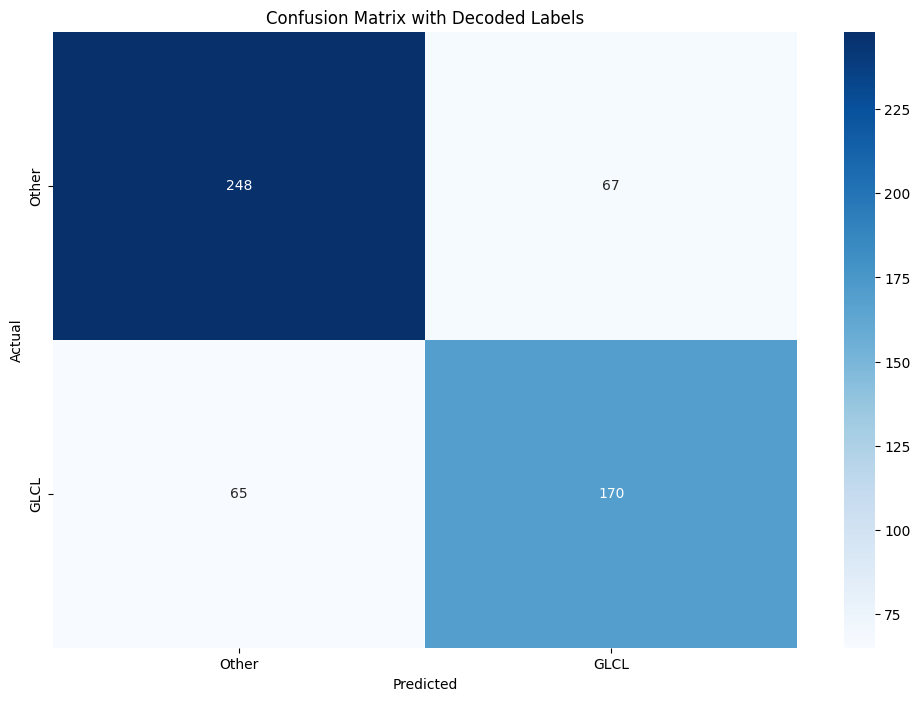

Model saved to catboost_model_Binary_Classification.pkl


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import catboost as cb
import numpy as np
from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier



# Decode the encoded labels back to the original labels
y_train_decoded = label_encoder.inverse_transform(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_calib_decoded = label_encoder.inverse_transform(y_calib)

# Important class
important_class = "GLCL"

# Converting to binary labels
y_train_binary = pd.Series([1 if label == important_class else 0 for label in y_train_decoded])
y_test_binary = pd.Series([1 if label == important_class else 0 for label in y_test_decoded])
y_calib_binary = pd.Series([1 if label == important_class else 0 for label in y_calib_decoded])

# Create a mapping for visualization
binary_to_original_mapping = {
    1: important_class,
    0: 'Other'
}
# Define the hyperparameter grid for CatBoost
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0]
}

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(random_seed=42, verbose=0)  # Ensure verbose is set to 0 for GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train_binary)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy Score: ", grid_search.best_score_)

# Get the best estimator
best_catg = grid_search.best_estimator_

# Train the XGBoost classifier with the best estimator
best_catg.fit(X_train, y_train_binary)

# Get predicted probabilities
y_pred_proba = best_catg.predict_proba(X_test)[:, 1]

# Function to evaluate different thresholds
def evaluate_thresholds_for_accuracy(y_test, y_pred_proba, thresholds):
    best_threshold = 0.5
    best_accuracy = 0.0
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
    return best_threshold, best_accuracy

# Define the range of thresholds to evaluate
thresholds = [i * 0.01 for i in range(100)]

# Find the best threshold for accuracy
best_threshold, best_accuracy = evaluate_thresholds_for_accuracy(y_test_binary, y_pred_proba, thresholds)


# Predict using the best threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model with the best threshold
print("Best Threshold:", best_threshold)
print("Best accuracy Score:", best_accuracy)

# Evaluate the classifier
accuracy = accuracy_score(y_test_binary, y_pred)
report = classification_report(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Decode the labels using the dictionary
decoded_labels = [binary_to_original_mapping[key] for key in sorted(binary_to_original_mapping)]

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'catboost_model_Binary_Classification.pkl'
joblib.dump(catboost_classifier, model_filename)
print(f'Model saved to {model_filename}')


Prediction Intervals Shape: (550, 2, 1)
Coverage: 0.9272727272727272
   Predicted Probability  Predicted Label  Lower Bound  Upper Bound  \
0               0.989336                1        False         True   
1               0.241023                1         True         True   
2               0.992725                1        False         True   
3               0.048497                0         True        False   
4               0.699076                1         True         True   

   True Label  
0           0  
1           1  
2           1  
3           0  
4           1  


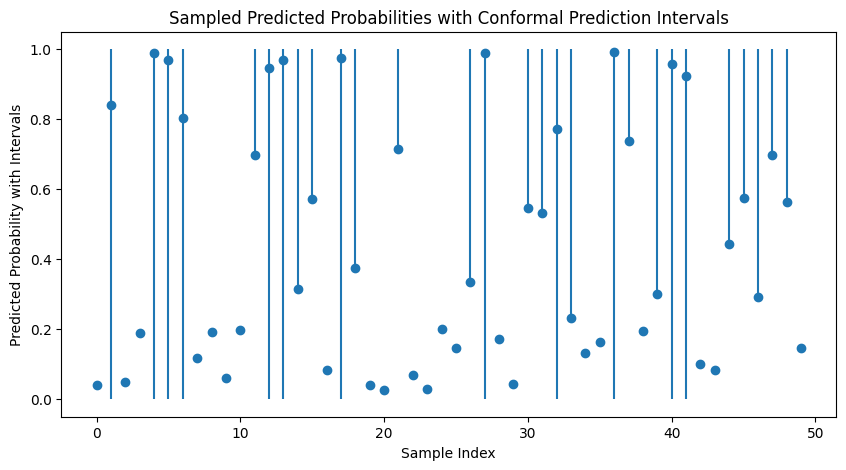

In [31]:
# Initialize Mapie for conformal prediction
mapie = MapieClassifier(estimator=best_catg, method="score", cv="prefit")

# Fit the conformal predictor on training and calibration data combined
mapie.fit(X_calib, y_calib_binary)

# Get prediction intervals for probabilities
prediction, prediction_intervals = mapie.predict(X_test, alpha=0.05)

# Inspect the shape of prediction_intervals
print("Prediction Intervals Shape:", prediction_intervals.shape)

# Extract lower and upper bounds for probabilities
lower_bounds = prediction_intervals[:, 0, 0]
upper_bounds = prediction_intervals[:, 1, 0]

# Calculate the error bars
yerr_lower = y_pred_proba - lower_bounds
yerr_upper = upper_bounds - y_pred_proba

# Ensure yerr contains no negative values
yerr_lower = np.maximum(0, yerr_lower)
yerr_upper = np.maximum(0, yerr_upper)

# Combine probabilities and intervals into a DataFrame
results_df = pd.DataFrame({
    'Predicted Probability': y_pred_proba,
    'Predicted Label': y_pred,
    'Lower Bound': lower_bounds,
    'Upper Bound': upper_bounds,
    'True Label': y_test_binary
})

# Calculate coverage
coverage = classification_coverage_score(y_test_binary, prediction_intervals[:, :, 0])
print("Coverage:", coverage)

# Print and visualize the results
print(results_df.head())

# Sample a subset of the data
sample_size = 50  # Adjust this to a suitable number for your data
sampled_df = results_df.sample(n=sample_size, random_state=42)

# Extract the sampled data
sampled_indices = sampled_df.index
sampled_predicted_probabilities = sampled_df['Predicted Probability'].values
sampled_lower_bounds = sampled_df['Lower Bound'].values
sampled_upper_bounds = sampled_df['Upper Bound'].values

# Calculate the error bars
sampled_yerr_lower = sampled_predicted_probabilities - sampled_lower_bounds
sampled_yerr_upper = sampled_upper_bounds - sampled_predicted_probabilities

# Ensure yerr contains no negative values
sampled_yerr_lower = np.maximum(0, sampled_yerr_lower)
sampled_yerr_upper = np.maximum(0, sampled_yerr_upper)

# Plot the sampled data
plt.figure(figsize=(10, 5))
plt.errorbar(range(len(sampled_predicted_probabilities)), sampled_predicted_probabilities, yerr=[sampled_yerr_lower, sampled_yerr_upper], fmt='o')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability with Intervals')
plt.title('Sampled Predicted Probabilities with Conformal Prediction Intervals')
plt.show()

###########Training on xgboost with binary classification#########

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Best accuracy Score:  0.7968353405853407
Best Threshold: 0.46
Best accuracy Score: 0.7618181818181818
Accuracy: 0.76


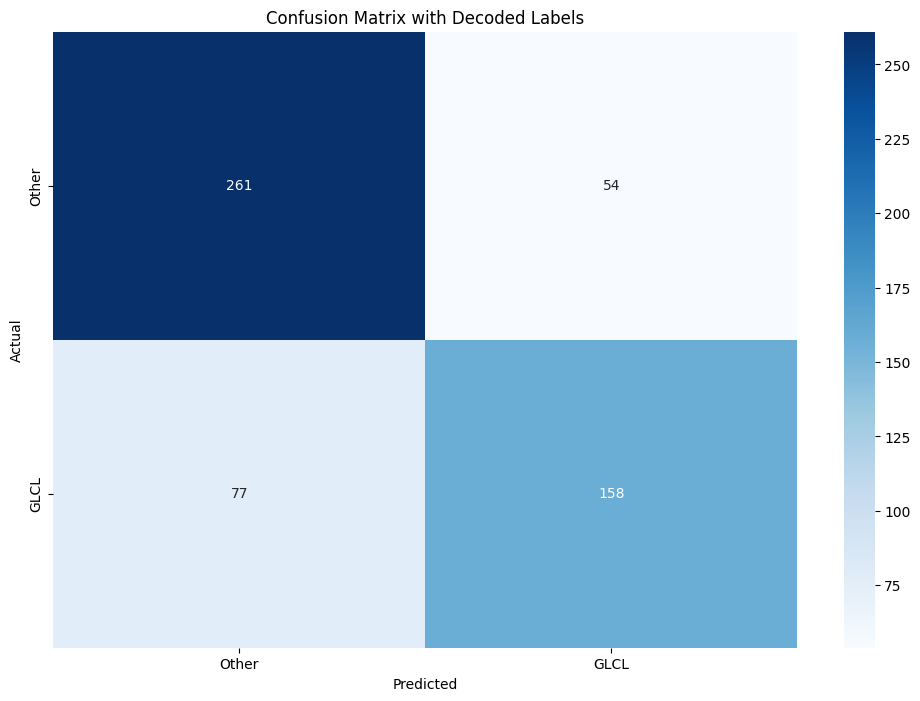

Model saved to xgboost_model_Binary_Classification.pkl


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import numpy as np  
from mapie.classification import MapieClassifier  
from mapie.metrics import classification_coverage_score  


from sklearn.model_selection import GridSearchCV


# Decode the encoded labels back to the original labels
y_train_decoded = label_encoder.inverse_transform(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_calib_decoded = label_encoder.inverse_transform(y_calib)



# Important class
important_class = "GLCL"

# Converting to binary labels
y_train_binary = pd.Series([1 if label == important_class else 0 for label in y_train_decoded])
y_test_binary = pd.Series([1 if label == important_class else 0 for label in y_test_decoded])
y_calib_binary = pd.Series([1 if label == important_class else 0 for label in y_calib_decoded])

# Create a mapping for visualization
binary_to_original_mapping = {
    1: important_class,
    0: 'Other'
}

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False)


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train_binary)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy Score: ", grid_search.best_score_)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Train the XGBoost classifier with the best estimator
best_xgb.fit(X_train, y_train_binary)

# Get predicted probabilities
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Function to evaluate different thresholds
def evaluate_thresholds_for_accuracy(y_test, y_pred_proba, thresholds):
    best_threshold = 0.5
    best_accuracy = 0.0
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
    return best_threshold, best_accuracy

# Define the range of thresholds to evaluate
thresholds = [i * 0.01 for i in range(100)]

# Find the best threshold for accuracy
best_threshold, best_accuracy = evaluate_thresholds_for_accuracy(y_test_binary, y_pred_proba, thresholds)


# Predict using the best threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model with the best threshold
print("Best Threshold:", best_threshold)
print("Best accuracy Score:", best_accuracy)

# Evaluate the classifier
accuracy = accuracy_score(y_test_binary, y_pred)  # Changed
report = classification_report(y_test_binary, y_pred)  # Changed
conf_matrix = confusion_matrix(y_test_binary, y_pred)  # Changed
print(f'Accuracy: {accuracy:.2f}')

# Decode the labels using the dictionary
decoded_labels = [binary_to_original_mapping[key] for key in sorted(binary_to_original_mapping)]

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'xgboost_model_Binary_Classification.pkl'
joblib.dump(xgb_classifier, model_filename)
print(f'Model saved to {model_filename}')





Prediction Intervals Shape: (550, 2, 1)
Coverage: 0.92
   Predicted Probability  Predicted Label  Lower Bound  Upper Bound  \
0               0.895324                1        False         True   
1               0.228188                0         True        False   
2               0.916022                1        False         True   
3               0.083639                0         True        False   
4               0.685189                1         True         True   

   True Label  
0           0  
1           1  
2           1  
3           0  
4           1  


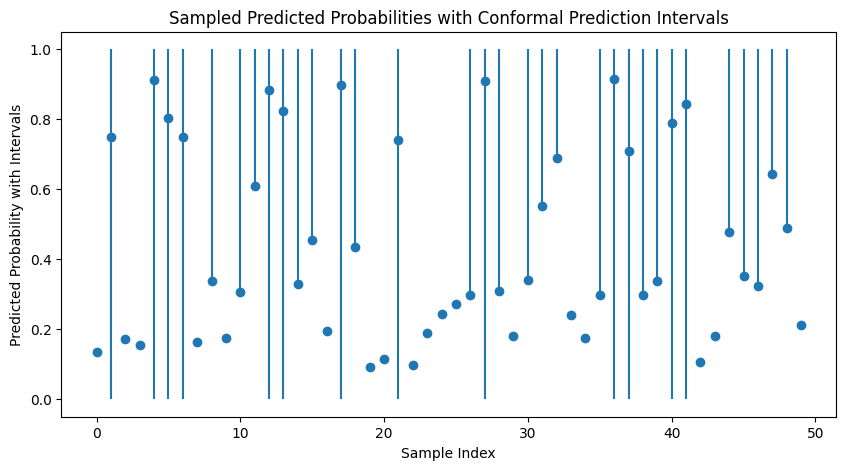

In [36]:
# Initialize Mapie for conformal prediction
mapie = MapieClassifier(estimator=best_xgb, method="score", cv="prefit")

# Fit the conformal predictor on training and calibration data combined
mapie.fit(X_calib, y_calib_binary)

# Get prediction intervals for probabilities
prediction, prediction_intervals = mapie.predict(X_test, alpha=0.05)

# Inspect the shape of prediction_intervals
print("Prediction Intervals Shape:", prediction_intervals.shape)

# Extract lower and upper bounds for probabilities
lower_bounds = prediction_intervals[:, 0, 0]
upper_bounds = prediction_intervals[:, 1, 0]

# Calculate the error bars
yerr_lower = y_pred_proba - lower_bounds
yerr_upper = upper_bounds - y_pred_proba

# Ensure yerr contains no negative values
yerr_lower = np.maximum(0, yerr_lower)
yerr_upper = np.maximum(0, yerr_upper)

# Combine probabilities and intervals into a DataFrame
results_df = pd.DataFrame({
    'Predicted Probability': y_pred_proba,
    'Predicted Label': y_pred,
    'Lower Bound': lower_bounds,
    'Upper Bound': upper_bounds,
    'True Label': y_test_binary
})

# Calculate coverage
coverage = classification_coverage_score(y_test_binary, prediction_intervals[:, :, 0])
print("Coverage:", coverage)

# Print and visualize the results
print(results_df.head())

# Sample a subset of the data
sample_size = 50  # Adjust this to a suitable number for your data
sampled_df = results_df.sample(n=sample_size, random_state=42)

# Extract the sampled data
sampled_indices = sampled_df.index
sampled_predicted_probabilities = sampled_df['Predicted Probability'].values
sampled_lower_bounds = sampled_df['Lower Bound'].values
sampled_upper_bounds = sampled_df['Upper Bound'].values

# Calculate the error bars
sampled_yerr_lower = sampled_predicted_probabilities - sampled_lower_bounds
sampled_yerr_upper = sampled_upper_bounds - sampled_predicted_probabilities

# Ensure yerr contains no negative values
sampled_yerr_lower = np.maximum(0, sampled_yerr_lower)
sampled_yerr_upper = np.maximum(0, sampled_yerr_upper)

# Plot the sampled data
plt.figure(figsize=(10, 5))
plt.errorbar(range(len(sampled_predicted_probabilities)), sampled_predicted_probabilities, yerr=[sampled_yerr_lower, sampled_yerr_upper], fmt='o')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability with Intervals')
plt.title('Sampled Predicted Probabilities with Conformal Prediction Intervals')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store precision, recall, accuracy, and F1 score for each label
precisions = []
recalls = []
f1_scores = []

print(binary_to_original_mapping.items())

# Calculate precision, recall, accuracy, and F1 score for each label
for index, label in binary_to_original_mapping.items():  # Swap label and index
    print(f"Processing index: {index}, label: {label}")
    
    if index == 1:
        print("Index is 1")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[1, 1]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[0, 1]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[1, 0]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[0, 0]
    elif index == 0:
        print("Index is 0")
        # True Positives (TP): Diagonal element for the current label
        tp = conf_matrix[0, 0]

        # False Positives (FP): Sum of the column for the current label excluding the diagonal element
        fp = conf_matrix[1, 0]

        # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
        fn = conf_matrix[0, 1]

        # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
        tn = conf_matrix[1, 1]
    else:
        assert False, f"Unexpected label value: {index}"  # Assert for unexpected values
        print("Index is neither 0 nor 1, skipping this index")
        continue  # Skip labels not covered in the binary mapping

    # Calculate Precision
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    precisions.append(precision)

    # Calculate Recall
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    recalls.append(recall)

    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1_score)

# Plot Precision, Recall, and F1 Score for each label
labels = list(binary_to_original_mapping.values())
x = np.arange(len(labels))

bar_width = 0.3

plt.figure(figsize=(16, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(precisions):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
plt.xticks(x, labels, rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.ylim(0, 1.1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

In [ ]:
#  Scatter plot of (umag - gmag) vs (imag - zmag) with globular clusters highlighted
plt.figure(figsize=(10, 8))  # Create a figure with specified size

# Plot other sources
plt.scatter(
    X_test['umag_minus_gmag'],  # Difference between umag and gmag for x-axis
    X_test['imag_minus_zmag'],  # Difference between imag and zmag for y-axis
    c='gray',  # Color for these points
    s=10,
    alpha=0.5,  # Transparency level
    label='Other Sources'  # Label for legend
)

# Highlight globular clusters
plt.scatter(
    X_test['umag_minus_gmag'][y_pred == 1],  # x-axis values for predicted globular clusters
    X_test['imag_minus_zmag'][y_pred == 1],  # y-axis values for predicted globular clusters
    c='red',  # Color for these points
    s=10,
    label='Globular Clusters'  # Label for legend
)

# Add labels and title
plt.xlabel('umag - gmag')  # Label for x-axis
plt.ylabel('imag - zmag')  # Label for y-axis
plt.xlim(0, 6)  # Limit the range for x-axis
plt.ylim(-1, 2)  # Limit the range for y-axis
plt.legend()  # Add legend to the plot
plt.title('Scatter Plot of (umag - gmag) vs (imag - zmag)')  # Title of the plot

# Display the plot
plt.show()



Unlabeled Data Analysis

In [ ]:
# # Make predictions on the unlabeled dataset
# unlabeled_data_proba = xgb_classifier.predict_proba(unlabeled_data)[:, 1]
# unlabeled_data_pred = (unlabeled_data_proba >= best_threshold).astype(int)



In [ ]:
# # Convert binary predictions to original labels using the mapping
# original_labels = np.array([binary_to_original_mapping[label] for label in unlabeled_data_pred])

# # Count occurrences of "GLCL" and "Other"
# glcl_count_un = np.sum(original_labels == "GLCL")
# other_count_un = np.sum(original_labels == "Other")
# total_count_un = len(original_labels)

# # Calculate percentage of "GLCL"
# glcl_percentage_un = (glcl_count_un / total_count_un) * 100

# print(f"Number of 'GLCL' labels in Unlabeled dataset: {glcl_count_un}")
# print(f"Number of 'Other' labels in Unlabeled dataset: {other_count_un}")
# print(f"Total number of labels in Unlabeled dataset: {total_count_un}")

# print(f"Percentage of 'GLCL' labels in Unlabeled dataset: {glcl_percentage_un:.2f}%")

In [ ]:
# # Plot other sources
# plt.scatter(
#     unlabeled_data['umag_minus_gmag'],  # Difference between umag and gmag for x-axis
#     unlabeled_data['imag_minus_zmag'],  # Difference between imag and zmag for y-axis
#     c='gray',  # Color for these points
#     s=10,
#     alpha=0.5,  # Transparency level
#     label='Other Sources'  # Label for legend
# )

# # Highlight predicted globular clusters
# plt.scatter(
#     unlabeled_data['umag_minus_gmag'][unlabeled_data_pred == 1],  # x-axis values for predicted globular clusters
#     unlabeled_data['imag_minus_zmag'][unlabeled_data_pred == 1],  # y-axis values for predicted globular clusters
#     c='red',  # Color for these points
#     s=20,
#     label='Predicted Globular Clusters'  # Label for legend
# )

# # Add labels and title
# plt.xlabel('umag - gmag')  # Label for x-axis
# plt.ylabel('imag - zmag')  # Label for y-axis
# plt.xlim(0, 6)  # Limit the range for x-axis
# plt.ylim(-1, 2)  # Limit the range for y-axis
# plt.legend()  # Add legend to the plot
# plt.title('Scatter Plot of Unlabeled Data (umag - gmag) vs (imag - zmag)')  # Title of the plot

# # Display the plot
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.manifold import TSNE
# import umap.umap_ as umap
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler


# # Select the relevant columns for dimensionality reduction
# # features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', ]
# features = ['umag_minus_gmag', 'umag_minus_rmag', 'umag_minus_imag',
#        'umag_minus_zmag', 'gmag_minus_rmag', 'gmag_minus_imag',
#        'gmag_minus_zmag', 'rmag_minus_imag', 'rmag_minus_zmag',
#        'imag_minus_zmag']

# unlabeled_data_features = unlabeled_data[features]

# # Standardize the data
# tsne_scaler = StandardScaler()
# unlabeled_data_scaled = tsne_scaler.fit_transform(unlabeled_data_features)

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# tsne_results = tsne.fit_transform(unlabeled_data_scaled)

# # Create a DataFrame for the t-SNE results
# tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'],  index=unlabeled_data.index)

# # Apply UMAP
# umap_model = umap.UMAP(n_components=2, random_state=42)
# umap_results = umap_model.fit_transform(unlabeled_data_scaled)

# # Create a DataFrame for the UMAP results
# umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'],  index=unlabeled_data.index)


# # Visualize t-SNE results
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c='gray', s=10, alpha=0.5, label='Other Sources')
# plt.scatter(tsne_df['TSNE1'][unlabeled_data_pred == 1], tsne_df['TSNE2'][unlabeled_data_pred == 1], c='red', s=10, label='Predicted Globular Clusters')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.legend()
# plt.title('t-SNE Scatter Plot of Unlabeled Data')
# plt.show()

# # Visualize UMAP results
# plt.figure(figsize=(10, 8))
# plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c='gray', s=10, alpha=0.5, label='Other Sources')
# plt.scatter(umap_df['UMAP1'][unlabeled_data_pred == 1], umap_df['UMAP2'][unlabeled_data_pred == 1], c='red', s=10, label='Predicted Globular Clusters')
# plt.xlabel('UMAP1')
# plt.ylabel('UMAP2')
# plt.legend()
# plt.title('UMAP Scatter Plot of Unlabeled Data')
# plt.show()


Countdown the targets predicted on unlabeled data

In [ ]:
# # Get unique values of the predicted labels
# unique_predictions = pd.Series(unlabeled_predictions_decoded).unique()
# print(f'Unique predicted labels: {unique_predictions}')

########### Training on Random Forest
############
############
###########
###########

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:')
# print(report)

# # Print the mapping between original labels and encoded values
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print("Label Mapping:", label_mapping)

# # Decode the labels using the dictionary
# decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
# print(decoded_labels)

# # Plot the confusion matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix with Decoded Labels')
# plt.show()


# # Feature importance
# feature_importances = rf_classifier.feature_importances_
# features = X_train.columns

# # Plot feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=feature_importances, y=features)
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importances in Random Forest Classifier')
# plt.show()

# # Save the trained model to a file
# model_filename = 'random_forest_model.pkl'
# joblib.dump(rf_classifier, model_filename)
# print(f'Model saved to {model_filename}')

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Number of classes
# num_classes = conf_matrix.shape[0]

# # Initialize lists to store precision, recall, and f1 score for each label
# precisions = []
# recalls = []
# f1_scores = []



# # Calculate precision, recall, and f1 score for each class
# for i in range(num_classes):
#     tp = conf_matrix[i, i]
#     fp = np.sum(conf_matrix[:, i]) - tp
#     fn = np.sum(conf_matrix[i, :]) - tp

#     precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#     precisions.append(precision)
#     recalls.append(recall)
#     f1_scores.append(f1_score)

# # Plot Precision, Recall, and F1 Score for each class
# labels = list(label_mapping.keys())
# x = np.arange(len(labels))
# bar_width = 0.3

# plt.figure(figsize=(16, 6))

# # Plot Precision
# plt.subplot(1, 3, 1)
# plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Precision')
# plt.title('Precision for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(precisions):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot Recall
# plt.subplot(1, 3, 2)
# plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Recall')
# plt.title('Recall for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(recalls):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot F1 Score
# plt.subplot(1, 3, 3)
# plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('F1 Score')
# plt.title('F1 Score for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(f1_scores):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# plt.tight_layout()
# plt.show()

######## Training on random Forest by Binarization #######

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib

# # Decode the encoded labels back to the original labels
# y_train_decoded = label_encoder.inverse_transform(y_train)
# y_test_decoded = label_encoder.inverse_transform(y_test)

# # Important class
# important_class = "GLCL"

# # Converting to binary labels
# y_train_binary = pd.Series([1 if label == important_class else 0 for label in y_train_decoded])
# y_test_binary = pd.Series([1 if label == important_class else 0 for label in y_test_decoded])

# # Create a mapping for visualization
# binary_to_original_mapping = {
#     1: important_class,
#     0: 'Other'
# }

# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train_binary)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test_binary, y_pred)
# report = classification_report(y_test_binary, y_pred)
# conf_matrix = confusion_matrix(y_test_binary, y_pred)

# print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:')
# print(report)

# # Decode the labels using the dictionary
# decoded_labels = [binary_to_original_mapping[key] for key in sorted(binary_to_original_mapping)]

# # Plot the confusion matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix with Decoded Labels')
# plt.show()

# # Save the trained model to a file
# model_filename = 'RandomForest_model_Binary_Classification.pkl'
# joblib.dump(rf_classifier, model_filename)
# print(f'Model saved to {model_filename}')


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize lists to store precision, recall, accuracy, and F1 score for each label
# precisions = []
# recalls = []
# f1_scores = []

# print(binary_to_original_mapping.items())

# # Calculate precision, recall, accuracy, and F1 score for each label
# for index, label in binary_to_original_mapping.items():  # Swap label and index
#     print(f"Processing index: {index}, label: {label}")
    
#     if index == 1:
#         print("Index is 1")
#         # True Positives (TP): Diagonal element for the current label
#         tp = conf_matrix[1, 1]

#         # False Positives (FP): Sum of the column for the current label excluding the diagonal element
#         fp = conf_matrix[0, 1]

#         # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
#         fn = conf_matrix[1, 0]

#         # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
#         tn = conf_matrix[0, 0]
#     elif index == 0:
#         print("Index is 0")
#         # True Positives (TP): Diagonal element for the current label
#         tp = conf_matrix[0, 0]

#         # False Positives (FP): Sum of the column for the current label excluding the diagonal element
#         fp = conf_matrix[1, 0]

#         # False Negatives (FN): Sum of the row for the current label excluding the diagonal element
#         fn = conf_matrix[0, 1]

#         # True Negatives (TN): Sum of all elements in the matrix excluding the current row and column
#         tn = conf_matrix[1, 1]
#     else:
#         assert False, f"Unexpected label value: {index}"  # Assert for unexpected values
#         print("Index is neither 0 nor 1, skipping this index")
#         continue  # Skip labels not covered in the binary mapping

#     # Calculate Precision
#     precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#     precisions.append(precision)

#     # Calculate Recall
#     recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#     recalls.append(recall)

#     # Calculate F1 Score
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
#     f1_scores.append(f1_score)

# # Plot Precision, Recall, and F1 Score for each label
# labels = list(binary_to_original_mapping.values())
# x = np.arange(len(labels))

# bar_width = 0.3

# plt.figure(figsize=(16, 6))

# # Plot Precision
# plt.subplot(1, 3, 1)
# plt.bar(x, precisions, width=bar_width, color='b', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Precision')
# plt.title('Precision for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(precisions):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot Recall
# plt.subplot(1, 3, 2)
# plt.bar(x, recalls, width=bar_width, color='g', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('Recall')
# plt.title('Recall for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(recalls):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# # Plot F1 Score
# plt.subplot(1, 3, 3)
# plt.bar(x, f1_scores, width=bar_width, color='m', alpha=0.7)
# plt.xticks(x, labels, rotation=90)
# plt.xlabel('Class')
# plt.ylabel('F1 Score')
# plt.title('F1 Score for each class')
# plt.ylim(0, 1.1)
# for i, v in enumerate(f1_scores):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

# plt.tight_layout()
# plt.show()